<a href="https://colab.research.google.com/github/Reyhaneh2001/mobilenet-cifar10-transfer-learning/blob/main/mobilenet_cifar10_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import random
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 106.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 113.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.8 MB/s eta 0:00:00


In [5]:
# Load CIFAR-10
(x_train, y_train), (x_val, y_val) = tf.keras.datasets.cifar10.load_data()

# Normalize
x_train = x_train.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0

# Resize to match MobileNetV2 input (128x128)
x_train = tf.image.resize(x_train, [128, 128])
x_val = tf.image.resize(x_val, [128, 128])

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


# **Define MobileNet model**

In [6]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(128, 128, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.4),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,589,514 (9.88 MB)

 Trainable params: 331,018 (1.26 MB)

 Non-trainable params: 2,258,496 (8.62 MB)

# **Train model**

In [7]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=10,
    batch_size=32
)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1093s 696ms/step - accuracy: 0.5305 - loss: 1.3923 - val_accuracy: 0.7556 - val_loss: 0.7056
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1075s 688ms/step - accuracy: 0.7275 - loss: 0.7886 - val_accuracy: 0.7753 - val_loss: 0.6416
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1078s 690ms/step - accuracy: 0.7599 - loss: 0.6985 - val_accuracy: 0.7867 - val_loss: 0.6112
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1071s 685ms/step - accuracy: 0.7762 - loss: 0.6498 - val_accuracy: 0.7940 - val_loss: 0.5923
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1077s 689ms/step - accuracy: 0.7903 - loss: 0.6107 - val_accuracy: 0.7994 - val_loss: 0.5802
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1067s 683ms/step - accuracy: 0.7983 - loss: 0.5797 - val_accuracy: 0.7985 - val_loss: 0.5732
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1079s 690ms/step - accuracy: 0.8057 - loss: 0.5602 - val_accuracy: 0.8029 - val_loss: 0.5668
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1090s 697ms/s

# **Plot results**

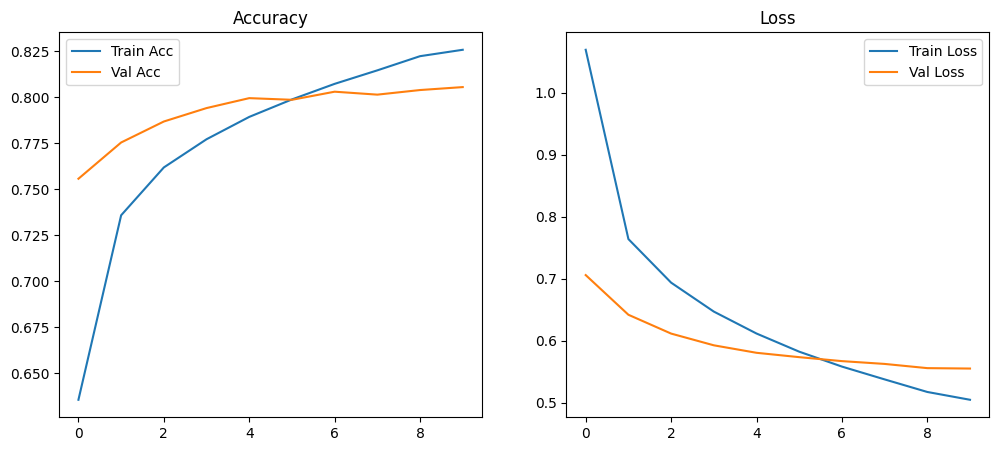

In [8]:
def plot_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.legend()
    plt.title('Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.legend()
    plt.title('Loss')

    plt.show()

plot_history(history)

In [12]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# **Predict on validation set**

In [15]:
y_true = np.argmax(y_val, axis=1)
y_pred_probs = model.predict(x_val)
y_pred = np.argmax(y_pred_probs, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 195s 620ms/step


# **Confusion Matrix**

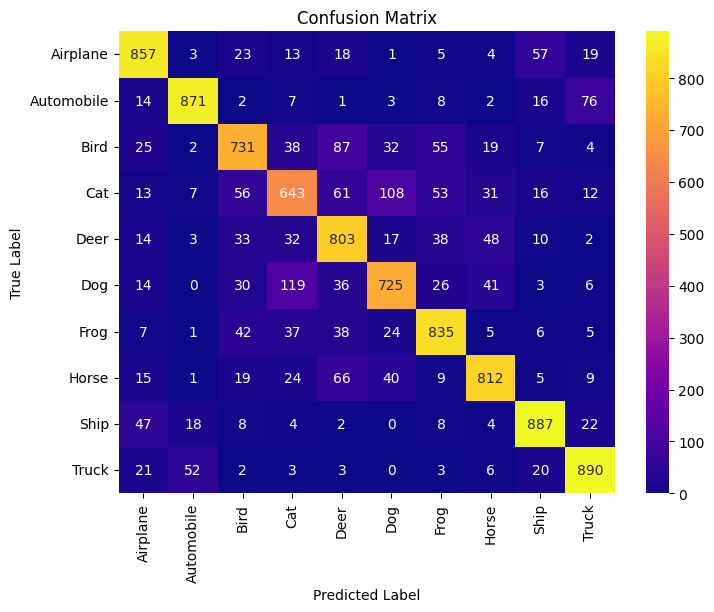

In [16]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='plasma', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# **Classification Report**

In [17]:
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

Classification Report:

              precision    recall  f1-score   support

    Airplane       0.83      0.86      0.85      1000
  Automobile       0.91      0.87      0.89      1000
        Bird       0.77      0.73      0.75      1000
         Cat       0.70      0.64      0.67      1000
        Deer       0.72      0.80      0.76      1000
         Dog       0.76      0.72      0.74      1000
        Frog       0.80      0.83      0.82      1000
       Horse       0.84      0.81      0.82      1000
        Ship       0.86      0.89      0.88      1000
       Truck       0.85      0.89      0.87      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.80     10000
weighted avg       0.81      0.81      0.80     10000



# **Show Sample Predictions**

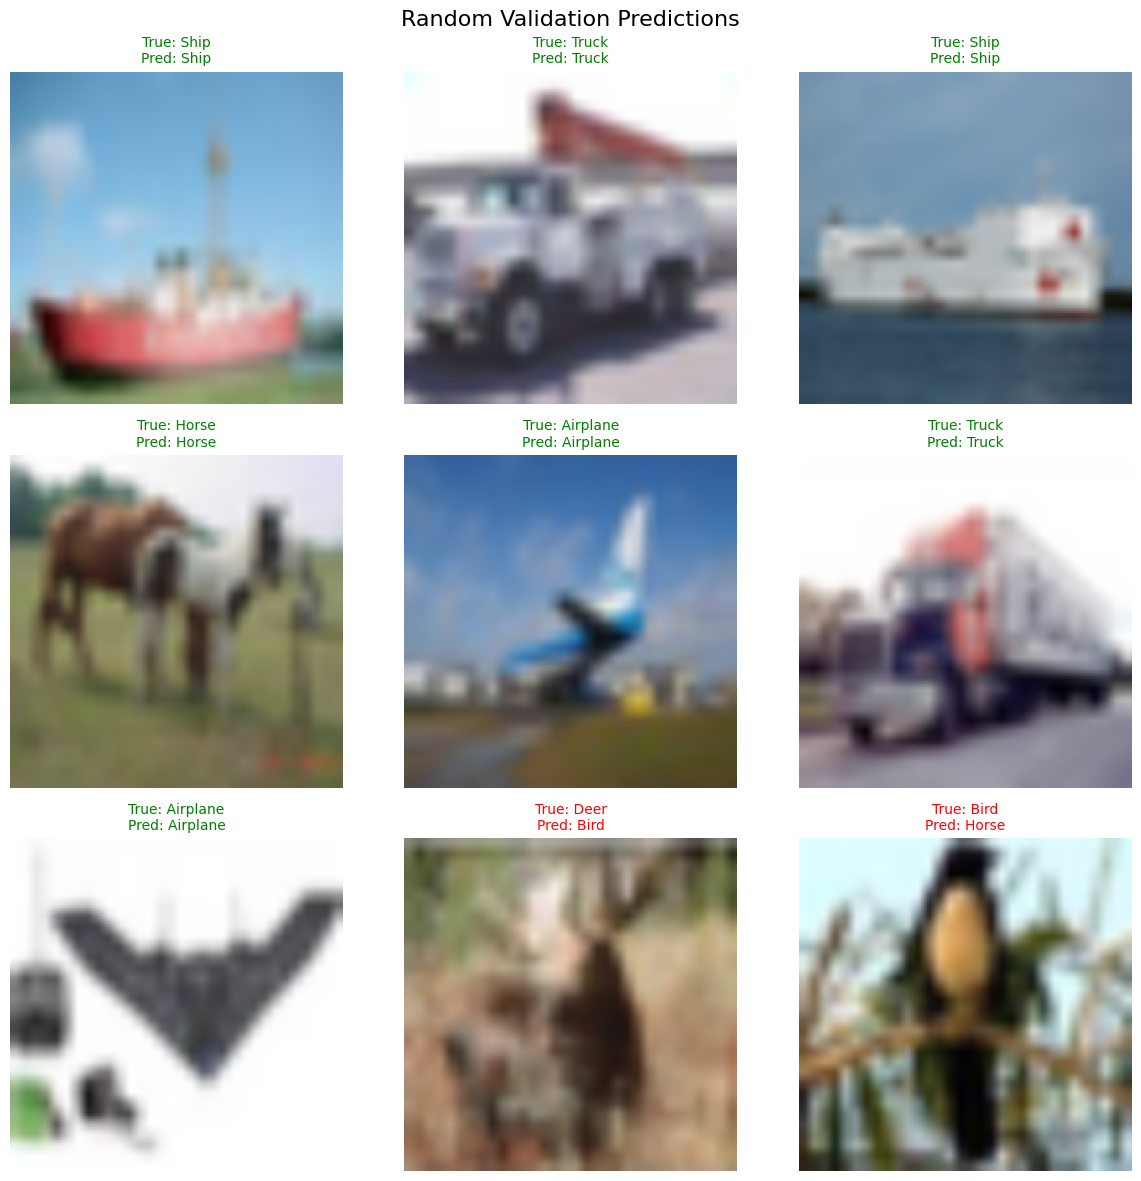

In [18]:
def show_predictions(x, y_true, y_pred, class_names, num=9):
    plt.figure(figsize=(12, 12))
    indices = random.sample(range(len(x)), num)
    for i, idx in enumerate(indices):
        plt.subplot(3, 3, i + 1)
        plt.imshow(x[idx].numpy())
        true_label = class_names[y_true[idx]]
        pred_label = class_names[y_pred[idx]]
        color = "green" if true_label == pred_label else "red"
        plt.title(f"True: {true_label}\nPred: {pred_label}", color=color, fontsize=10)
        plt.axis('off')
    plt.suptitle("Random Validation Predictions", fontsize=16)
    plt.tight_layout()
    plt.show()

show_predictions(x_val, y_true, y_pred, class_names)